# Lesson 4. Crop Spatial Raster Data With a Shapefile in Python

## About Spatial Crop

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5)

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


## Open Raster and Vector Layers


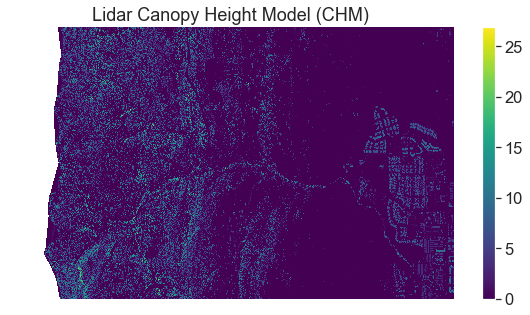

In [10]:
## Define file path
lidar_chm_path = os.path.join("colorado-flood", 
                              "spatial"
                              "boulder-leehill-rd",
                              "outputs",
                              "lidar_chm.tif")

lidar_chm_im = rxr.open_rasterio("colorado-flood/spatial/boulder-leehill-rd/outputs/lidar_chm.tif",
                                masked=True).squeeze()

f, ax = plt.subplots(figsize=(10,5))
lidar_chm_im.plot.imshow()
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

## Open Vector Layer


In [11]:
aoi = os.path.join("colorado-flood",
                   "spatial",
                   "boulder-leehill-rd",
                   "clip-extent.shp")

# open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)

In [12]:
print("crop extent crs: ", crop_extent.crs)
print("lidar crs: ", lidar_chm_im.rio.crs)

crop extent crs:  epsg:32613
lidar crs:  EPSG:32613


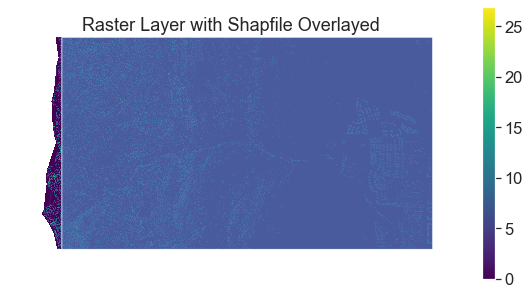

In [18]:
f, ax = plt.subplots(figsize=(10,5))
lidar_chm_im.plot.imshow(ax=ax)

crop_extent.plot(ax=ax,
                alpha=0.8)
ax.set(title="Raster Layer with Shapfile Overlayed")

ax.set_axis_off()
plt.show()

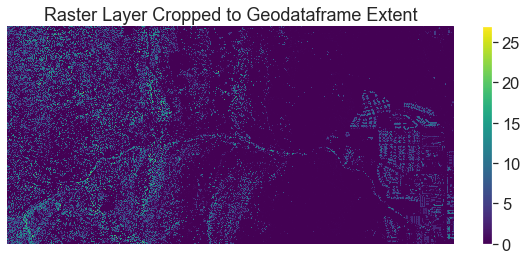

In [21]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping),
                                     crop_extent.crs)

f, ax = plt.subplots(figsize=(10,4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [22]:
# Define path to folder
path_to_tif_file = os.path.join("colorado-flood",
                                "spatial",
                                "outputs",
                                "lidar_chm_cropped.tif")

# Write the data to new geotiff file
lidar_clipped.rio.to_raster(path_to_tif_file)

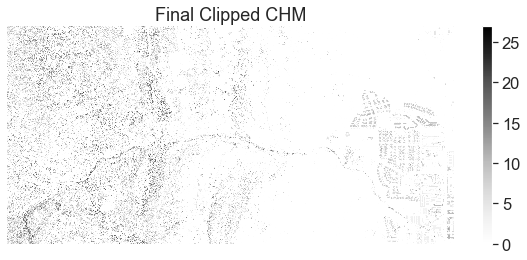

In [23]:
# oepn the data you wrote out above
clipped_chm = rxr.open_rasterio(path_to_tif_file)

f, ax = plt.subplots(figsize=(10,4))
clipped_chm.plot(ax=ax,
                cmap="Greys")
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()